# 1. 환율데이터 확보

In [2]:
# finance.yahoo.com를 활용한 데이터 확보하기
import yfinance as yf
import pandas as pd
from datetime import datetime

In [3]:
# 환율 데이터를 가져올 통화 쌍, 기간 설정
currency_pair = 'KRW=X'
start_date = '2000-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')    # 현재 날짜를 문자열로 변환하여 설정

In [4]:
# yfinance를 사용하여 환율 데이터 가져오기
df = yf.download(currency_pair, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [5]:
# 출력
display(df)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1197.300049,1203.500000,1195.000000,1198.400024,1198.400024,0
2003-12-02,1198.099976,1198.500000,1186.199951,1195.000000,1195.000000,0
2003-12-03,1195.000000,1198.400024,1192.500000,1192.500000,1192.500000,0
2003-12-04,1192.599976,1197.900024,1174.800049,1190.099976,1190.099976,0
2003-12-05,1189.400024,1193.800049,1178.599976,1184.699951,1184.699951,0
...,...,...,...,...,...,...
2024-02-26,1330.000000,1332.579956,1327.709961,1330.000000,1330.000000,0
2024-02-27,1331.719971,1332.599976,1329.050049,1331.719971,1331.719971,0
2024-02-28,1331.790039,1337.229980,1330.119995,1331.790039,1331.790039,0


# 2. 데이터 전처리

In [6]:
# 데이터 프레임의 구조 (컬럼들)
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
# df의 Close 값만 남기고 다른 데이터는 모두 없애기
df = df[['Close']]

In [8]:
df

,Close
Date,
2003-12-01,1198.400024
2003-12-02,1195.000000
2003-12-03,1192.500000
2003-12-04,1190.099976
2003-12-05,1184.699951
...,...
2024-02-26,1330.000000
2024-02-27,1331.719971
2024-02-28,1331.790039


In [9]:
'''
        일자          가격          1일전가격       2일전가격
        ------------------------------------------------------------------
        D+01           6              N/A              N/A
        D+02           7               6               N/A
        D+03           6               7                6
        D+04           7               6                7
        D+05           8               7                6
        D+06           7               8                7
        D+07           8               7                8
        D+08           9               8                7
        D+09          10               9                8
        D+10           7              10                9
'''
# df의 Close 값을 기준으로  1일전 데이터로 새로운 컬럼(Close-01)을 만들기
df['Close-01'] = df['Close'].shift(1)
df

<ipython-input-9-de0f929e697f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close-01'] = df['Close'].shift(1)


,Close,Close-01
Date,,
2003-12-01,1198.400024,NaN
2003-12-02,1195.000000,1198.400024
2003-12-03,1192.500000,1195.000000
2003-12-04,1190.099976,1192.500000
2003-12-05,1184.699951,1190.099976
...,...,...
2024-02-26,1330.000000,1327.170044
2024-02-27,1331.719971,1330.000000
2024-02-28,1331.790039,1331.719971


In [10]:
# df의 Close 값을 기준으로  2일전 데이터로 새로운 컬럼(Close-02)을 만들기
df['Close-02'] = df['Close'].shift(2)
df

<ipython-input-10-a1c778590b84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close-02'] = df['Close'].shift(2)


,Close,Close-01,Close-02
Date,,,
2003-12-01,1198.400024,NaN,NaN
2003-12-02,1195.000000,1198.400024,NaN
2003-12-03,1192.500000,1195.000000,1198.400024
2003-12-04,1190.099976,1192.500000,1195.000000
2003-12-05,1184.699951,1190.099976,1192.500000
...,...,...,...
2024-02-26,1330.000000,1327.170044,1332.869995
2024-02-27,1331.719971,1330.000000,1327.170044
2024-02-28,1331.790039,1331.719971,1330.000000


In [11]:
# 앞선 방식을 통해서 Close-01 ~ Close-30 까지 총 30개의 새로운 컬럼 만들기
for i in range(1, 31):
  df[f'Close-{str(i).zfill(2)}'] = df['Close'].shift(i)

df

<ipython-input-11-3f8d100653c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Close-{str(i).zfill(2)}'] = df['Close'].shift(i)
<ipython-input-11-3f8d100653c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Close-{str(i).zfill(2)}'] = df['Close'].shift(i)
<ipython-input-11-3f8d100653c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,Close,Close-01,Close-02,Close-03,Close-04,Close-05,Close-06,Close-07,Close-08,Close-09,...,Close-21,Close-22,Close-23,Close-24,Close-25,Close-26,Close-27,Close-28,Close-29,Close-30
Date,,,,,,,,,,,,,,,,,,,,,
2003-12-01,1198.400024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-02,1195.000000,1198.400024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-03,1192.500000,1195.000000,1198.400024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-04,1190.099976,1192.500000,1195.000000,1198.400024,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-12-05,1184.699951,1190.099976,1192.500000,1195.000000,1198.400024,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-26,1330.000000,1327.170044,1332.869995,1333.750000,1333.339966,1331.579956,1327.660034,1326.000000,1340.790039,1328.500000,...,1336.030029,1329.890015,1336.780029,1338.739990,1333.209961,1337.660034,1344.050049,1337.790039,1319.709961,1312.849976
2024-02-27,1331.719971,1330.000000,1327.170044,1332.869995,1333.750000,1333.339966,1331.579956,1327.660034,1326.000000,1340.790039,...,1336.760010,1336.030029,1329.890015,1336.780029,1338.739990,1333.209961,1337.660034,1344.050049,1337.790039,1319.709961
2024-02-28,1331.790039,1331.719971,1330.000000,1327.170044,1332.869995,1333.750000,1333.339966,1331.579956,1327.660034,1326.000000,...,1333.209961,1336.760010,1336.030029,1329.890015,1336.780029,1338.739990,1333.209961,1337.660034,1344.050049,1337.790039


In [12]:
# 앞서 만들어진 데이터의 결측치가 있는 데이터는 삭제처리
df = df.dropna()


In [13]:
df

,Close,Close-01,Close-02,Close-03,Close-04,Close-05,Close-06,Close-07,Close-08,Close-09,...,Close-21,Close-22,Close-23,Close-24,Close-25,Close-26,Close-27,Close-28,Close-29,Close-30
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-12,1168.800049,1181.300049,1171.000000,1176.800049,1189.400024,1178.900024,1195.800049,1181.599976,1189.900024,1194.800049,...,1173.199951,1169.900024,1176.400024,1182.699951,1185.599976,1184.699951,1190.099976,1192.500000,1195.000000,1198.400024
2004-01-13,1175.300049,1168.800049,1181.300049,1171.000000,1176.800049,1189.400024,1178.900024,1195.800049,1181.599976,1189.900024,...,1179.900024,1173.199951,1169.900024,1176.400024,1182.699951,1185.599976,1184.699951,1190.099976,1192.500000,1195.000000
2004-01-14,1175.199951,1175.300049,1168.800049,1181.300049,1171.000000,1176.800049,1189.400024,1178.900024,1195.800049,1181.599976,...,1179.800049,1179.900024,1173.199951,1169.900024,1176.400024,1182.699951,1185.599976,1184.699951,1190.099976,1192.500000
2004-01-15,1174.500000,1175.199951,1175.300049,1168.800049,1181.300049,1171.000000,1176.800049,1189.400024,1178.900024,1195.800049,...,1187.000000,1179.800049,1179.900024,1173.199951,1169.900024,1176.400024,1182.699951,1185.599976,1184.699951,1190.099976
2004-01-16,1186.699951,1174.500000,1175.199951,1175.300049,1168.800049,1181.300049,1171.000000,1176.800049,1189.400024,1178.900024,...,1183.800049,1187.000000,1179.800049,1179.900024,1173.199951,1169.900024,1176.400024,1182.699951,1185.599976,1184.699951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-26,1330.000000,1327.170044,1332.869995,1333.750000,1333.339966,1331.579956,1327.660034,1326.000000,1340.790039,1328.500000,...,1336.030029,1329.890015,1336.780029,1338.739990,1333.209961,1337.660034,1344.050049,1337.790039,1319.709961,1312.849976
2024-02-27,1331.719971,1330.000000,1327.170044,1332.869995,1333.750000,1333.339966,1331.579956,1327.660034,1326.000000,1340.790039,...,1336.760010,1336.030029,1329.890015,1336.780029,1338.739990,1333.209961,1337.660034,1344.050049,1337.790039,1319.709961
2024-02-28,1331.790039,1331.719971,1330.000000,1327.170044,1332.869995,1333.750000,1333.339966,1331.579956,1327.660034,1326.000000,...,1333.209961,1336.760010,1336.030029,1329.890015,1336.780029,1338.739990,1333.209961,1337.660034,1344.050049,1337.790039


In [14]:
# df의 index 출력하기
df.index

DatetimeIndex(['2004-01-12', '2004-01-13', '2004-01-14', '2004-01-15',
               '2004-01-16', '2004-01-19', '2004-01-20', '2004-01-21',
               '2004-01-22', '2004-01-23',
               ...
               '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22',
               '2024-02-23', '2024-02-26', '2024-02-27', '2024-02-28',
               '2024-02-29', '2024-03-01'],
              dtype='datetime64[ns]', name='Date', length=5224, freq=None)

In [18]:
# 2022년 12월 31일까지 데이터를 학습데이터로, 2023년 1월 1일부터의 데이터를 검증데이터로 선택하기

# 2022년 12월 31일까지의 데이터를 학습 데이터로 선택
train_data = df.loc[:'2022-12-31']

# 2024년 1월 1일부터의 데이터를 검증 데이터로 선택
validation_data = df.loc['2023-01-01':]


In [19]:
train_data

,Close,Close-01,Close-02,Close-03,Close-04,Close-05,Close-06,Close-07,Close-08,Close-09,...,Close-21,Close-22,Close-23,Close-24,Close-25,Close-26,Close-27,Close-28,Close-29,Close-30
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-12,1168.800049,1181.300049,1171.000000,1176.800049,1189.400024,1178.900024,1195.800049,1181.599976,1189.900024,1194.800049,...,1173.199951,1169.900024,1176.400024,1182.699951,1185.599976,1184.699951,1190.099976,1192.500000,1195.000000,1198.400024
2004-01-13,1175.300049,1168.800049,1181.300049,1171.000000,1176.800049,1189.400024,1178.900024,1195.800049,1181.599976,1189.900024,...,1179.900024,1173.199951,1169.900024,1176.400024,1182.699951,1185.599976,1184.699951,1190.099976,1192.500000,1195.000000
2004-01-14,1175.199951,1175.300049,1168.800049,1181.300049,1171.000000,1176.800049,1189.400024,1178.900024,1195.800049,1181.599976,...,1179.800049,1179.900024,1173.199951,1169.900024,1176.400024,1182.699951,1185.599976,1184.699951,1190.099976,1192.500000
2004-01-15,1174.500000,1175.199951,1175.300049,1168.800049,1181.300049,1171.000000,1176.800049,1189.400024,1178.900024,1195.800049,...,1187.000000,1179.800049,1179.900024,1173.199951,1169.900024,1176.400024,1182.699951,1185.599976,1184.699951,1190.099976
2004-01-16,1186.699951,1174.500000,1175.199951,1175.300049,1168.800049,1181.300049,1171.000000,1176.800049,1189.400024,1178.900024,...,1183.800049,1187.000000,1179.800049,1179.900024,1173.199951,1169.900024,1176.400024,1182.699951,1185.599976,1184.699951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,1279.239990,1290.199951,1280.770020,1283.640015,1301.329956,1308.859985,1317.099976,1295.680054,1288.979980,1305.920044,...,1317.890015,1336.810059,1352.689941,1359.750000,1339.030029,1342.750000,1336.430054,1316.260010,1324.079956,1313.030029
2022-12-27,1275.130005,1279.239990,1290.199951,1280.770020,1283.640015,1301.329956,1308.859985,1317.099976,1295.680054,1288.979980,...,1334.560059,1317.890015,1336.810059,1352.689941,1359.750000,1339.030029,1342.750000,1336.430054,1316.260010,1324.079956
2022-12-28,1272.280029,1275.130005,1279.239990,1290.199951,1280.770020,1283.640015,1301.329956,1308.859985,1317.099976,1295.680054,...,1340.119995,1334.560059,1317.890015,1336.810059,1352.689941,1359.750000,1339.030029,1342.750000,1336.430054,1316.260010


In [20]:
validation_data

,Close,Close-01,Close-02,Close-03,Close-04,Close-05,Close-06,Close-07,Close-08,Close-09,...,Close-21,Close-22,Close-23,Close-24,Close-25,Close-26,Close-27,Close-28,Close-29,Close-30
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02,1260.910034,1260.260010,1274.319946,1272.280029,1275.130005,1279.239990,1290.199951,1280.770020,1283.640015,1301.329956,...,1303.250000,1279.800049,1325.369995,1340.119995,1334.560059,1317.890015,1336.810059,1352.689941,1359.750000,1339.030029
2023-01-03,1270.099976,1260.910034,1260.260010,1274.319946,1272.280029,1275.130005,1279.239990,1290.199951,1280.770020,1283.640015,...,1299.170044,1303.250000,1279.800049,1325.369995,1340.119995,1334.560059,1317.890015,1336.810059,1352.689941,1359.750000
2023-01-04,1279.079956,1270.099976,1260.910034,1260.260010,1274.319946,1272.280029,1275.130005,1279.239990,1290.199951,1280.770020,...,1304.369995,1299.170044,1303.250000,1279.800049,1325.369995,1340.119995,1334.560059,1317.890015,1336.810059,1352.689941
2023-01-05,1271.079956,1279.079956,1270.099976,1260.910034,1260.260010,1274.319946,1272.280029,1275.130005,1279.239990,1290.199951,...,1319.709961,1304.369995,1299.170044,1303.250000,1279.800049,1325.369995,1340.119995,1334.560059,1317.890015,1336.810059
2023-01-06,1274.180054,1271.079956,1279.079956,1270.099976,1260.910034,1260.260010,1274.319946,1272.280029,1275.130005,1279.239990,...,1314.099976,1319.709961,1304.369995,1299.170044,1303.250000,1279.800049,1325.369995,1340.119995,1334.560059,1317.890015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-26,1330.000000,1327.170044,1332.869995,1333.750000,1333.339966,1331.579956,1327.660034,1326.000000,1340.790039,1328.500000,...,1336.030029,1329.890015,1336.780029,1338.739990,1333.209961,1337.660034,1344.050049,1337.790039,1319.709961,1312.849976
2024-02-27,1331.719971,1330.000000,1327.170044,1332.869995,1333.750000,1333.339966,1331.579956,1327.660034,1326.000000,1340.790039,...,1336.760010,1336.030029,1329.890015,1336.780029,1338.739990,1333.209961,1337.660034,1344.050049,1337.790039,1319.709961
2024-02-28,1331.790039,1331.719971,1330.000000,1327.170044,1332.869995,1333.750000,1333.339966,1331.579956,1327.660034,1326.000000,...,1333.209961,1336.760010,1336.030029,1329.890015,1336.780029,1338.739990,1333.209961,1337.660034,1344.050049,1337.790039


In [21]:
# 학습데이터에서 예측하고자 하는 데이터 Close 값 (y_train)이고, 데이터의 특성은 Close-01 ~ Close-30 데이터(X_train)로 구분하기
y_train = train_data['Close']

# 종가를 제외한 30일간 데이터를 특성
X_train = train_data[['Close-01', 'Close-02','Close-03','Close-04','Close-05',
                      'Close-06', 'Close-07','Close-08','Close-09','Close-10',
                      'Close-11', 'Close-12','Close-13','Close-14','Close-15',
                      'Close-16', 'Close-17','Close-18','Close-19','Close-20',
                      'Close-21', 'Close-22','Close-23','Close-24','Close-25',
                      'Close-26', 'Close-27','Close-28','Close-29','Close-30'
                    ]]


In [22]:
# 검증데이터에서 예측하고자 하는 데이터 Close 값 (y_test)이고, 데이터의 특성은 Close-01 ~ Close-30 데이터(X_test)로 구분하기
y_test = validation_data['Close']

# 종가를 제외한 30일간 데이터를 특성
X_test = validation_data[['Close-01', 'Close-02','Close-03','Close-04','Close-05',
                      'Close-06', 'Close-07','Close-08','Close-09','Close-10',
                      'Close-11', 'Close-12','Close-13','Close-14','Close-15',
                      'Close-16', 'Close-17','Close-18','Close-19','Close-20',
                      'Close-21', 'Close-22','Close-23','Close-24','Close-25',
                      'Close-26', 'Close-27','Close-28','Close-29','Close-30'
                    ]]

In [23]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 회귀 모델 생성 (n_estimators 트리개수 100)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
# 만들어진 회귀모델에 X_test를 넣어 예측값을 추출하기 (y_pred)
y_pred = rf_regressor.predict(X_test)

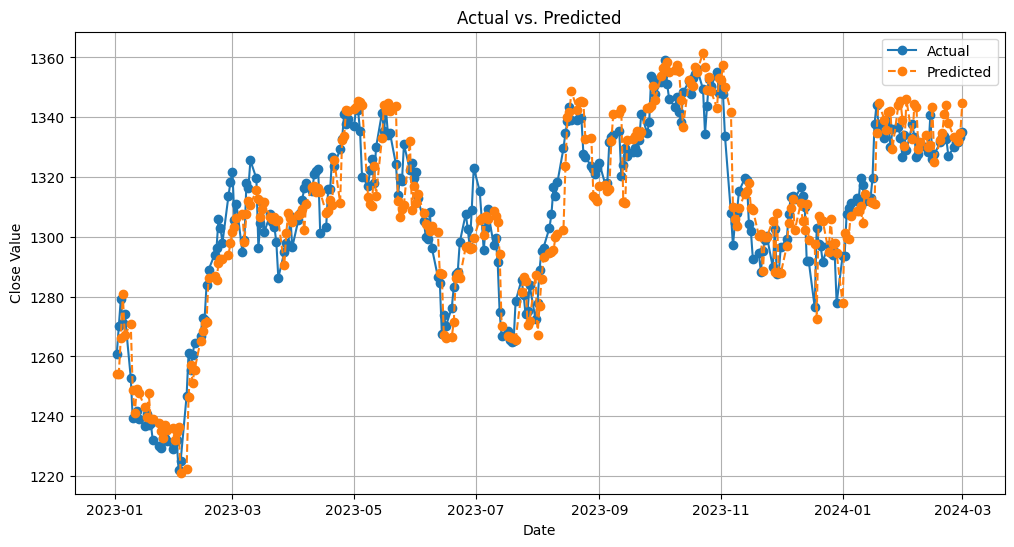

In [26]:
# 이제 y_test와 y_pred를 비교해서 시각화하기

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual', marker='o', linestyle='-')
plt.plot(y_test.index, y_pred, label='Predicted', marker='o', linestyle='--')
plt.title('Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed
<ipython-input-27-dc584913f4b9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Close-{str(i).zfill(2)}'] = df['Close'].shift(i)
<ipython-input-27-dc584913f4b9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Close-{str(i).zfill(2)}'] = df['Close'].shift(i)
<ipython-input-27-dc584913f4b9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

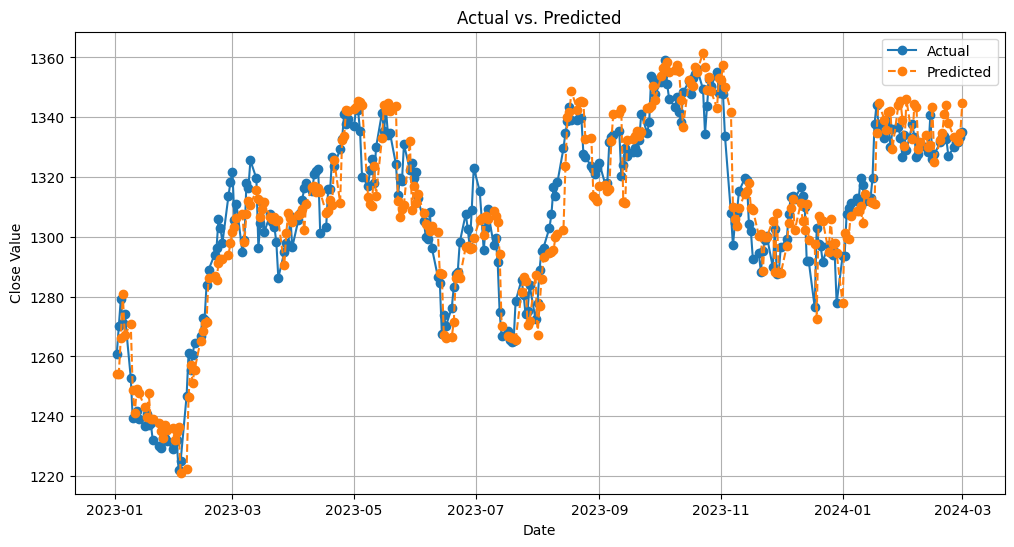

In [27]:
# 전체프로세스 통합
import yfinance as yf
import pandas as pd
from datetime import datetime
currency_pair = 'KRW=X'
start_date = '2000-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')    # 현재 날짜를 문자열로 변환하여 설정
df = yf.download(currency_pair, start=start_date, end=end_date)
df = df[['Close']]
for i in range(1, 31):
  df[f'Close-{str(i).zfill(2)}'] = df['Close'].shift(i)
df = df.dropna()
# 2022년 12월 31일까지의 데이터를 학습 데이터로 선택
train_data = df.loc[:'2022-12-31']

# 2024년 1월 1일부터의 데이터를 검증 데이터로 선택
validation_data = df.loc['2023-01-01':]

y_train = train_data['Close']

# 종가를 제외한 30일간 데이터를 특성
X_train = train_data[['Close-01', 'Close-02','Close-03','Close-04','Close-05',
                      'Close-06', 'Close-07','Close-08','Close-09','Close-10',
                      'Close-11', 'Close-12','Close-13','Close-14','Close-15',
                      'Close-16', 'Close-17','Close-18','Close-19','Close-20',
                      'Close-21', 'Close-22','Close-23','Close-24','Close-25',
                      'Close-26', 'Close-27','Close-28','Close-29','Close-30'
                    ]]
y_test = validation_data['Close']

# 종가를 제외한 30일간 데이터를 특성
X_test = validation_data[['Close-01', 'Close-02','Close-03','Close-04','Close-05',
                      'Close-06', 'Close-07','Close-08','Close-09','Close-10',
                      'Close-11', 'Close-12','Close-13','Close-14','Close-15',
                      'Close-16', 'Close-17','Close-18','Close-19','Close-20',
                      'Close-21', 'Close-22','Close-23','Close-24','Close-25',
                      'Close-26', 'Close-27','Close-28','Close-29','Close-30'
                    ]]
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 회귀 모델 생성 (n_estimators 트리개수 100)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual', marker='o', linestyle='-')
plt.plot(y_test.index, y_pred, label='Predicted', marker='o', linestyle='--')
plt.title('Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.legend()
plt.grid(True)
plt.show()